# Подключение библиотек и скриптов

In [2]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle  

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [4]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

matplotlib.rcParams.update({'font.size': 14})

In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [6]:
df_train = pd.read_csv(filepath_or_buffer="train.csv", sep=',')

In [7]:
df_train.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [8]:
df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [9]:
df_train.dtypes

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

In [10]:
# Изменим типы данных в столбцах

df_train['DistrictId'] = df_train['DistrictId'].astype(str)
df_train['Rooms'] = df_train['Rooms'].astype('int16')
df_train['Social_1'] = df_train['Social_1'].astype('int16')
df_train['Social_2'] = df_train['Social_2'].astype('int16')
df_train['Social_3'] = df_train['Social_3'].astype('int16')
df_train['Id'] = df_train['Id'].astype('object')

In [11]:
# Посмотрим рампределения признаков 

df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315720,37.199665,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,0.839512,21.058716,86.241219,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,1.000000,41.774879,22.769833,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,2.000000,65.900627,45.128803,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [12]:
# Проверим типы дынных и объем памяти

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  object  
 1   DistrictId     10000 non-null  object  
 2   Rooms          10000 non-null  int16   
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int16   
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [13]:
# Заполним пропуски
                                                                                
imputer = KNNImputer(n_neighbors=9, weights="uniform")
df_train[df_train.select_dtypes(
    include = ['int16','float64', 'float32', 'float16']).columns] = imputer.fit_transform(
    df_train[df_train.select_dtypes(include=['int16','float64', 'float32', 'float16']).columns])

In [14]:
df_train.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

Целевая переменная

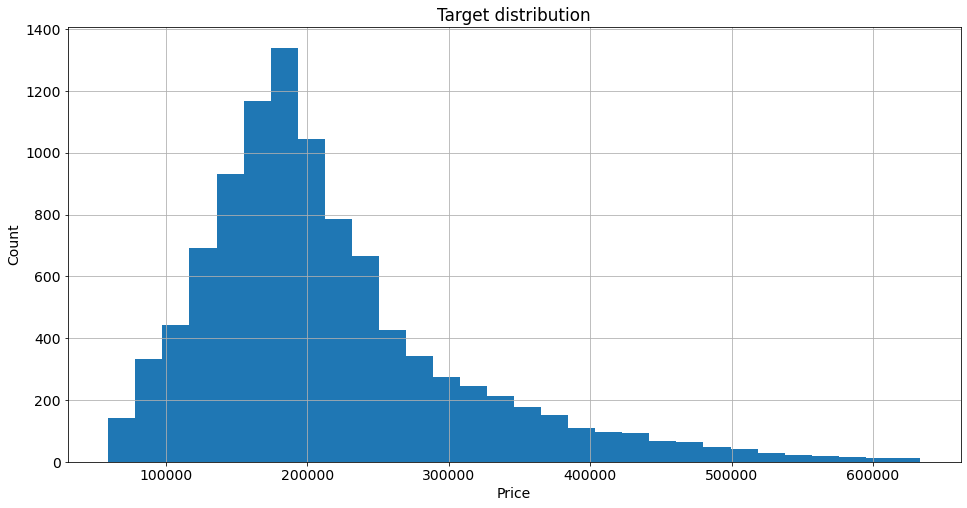

In [15]:
plt.figure(figsize=(16, 8))

df_train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [16]:
target_mean = round(df_train['Price'].mean(), 2)
target_median = df_train['Price'].median()
target_mode = df_train['Price'].mode()[0]

In [17]:
print (f'mean {target_mean}, median {target_median}, mode {target_mode}')

mean 214138.94, median 192269.65625, mode 182938.078125


In [18]:
medians_for_all_features = df_train.groupby(['DistrictId']).median()

## Шаг 3: Очистка данных и Feature engineering

In [19]:
# Проверим выбросы столбца площадь квартиры

df_train[df_train['Square'] > np.quantile(df_train['Square'] ,0.999)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
726,28,9,2.0,604.705994,24.879076,1.0,17,18.0,1977,0.161532,B,B,25.0,5648.0,1.0,30.000000,2,4,B,187717.250000
1606,3718,56,3.0,190.857681,107.376167,19.0,7,3.0,2007,0.000000,B,B,23.0,5067.0,4.0,1517.888916,2,6,B,338644.062500
1776,16568,27,4.0,200.334534,201.627365,25.0,1,2.0,2013,0.041116,B,B,53.0,14892.0,4.0,1548.222168,1,4,B,528560.500000
1906,5548,86,5.0,275.645294,233.949310,26.0,12,37.0,2011,0.161976,B,A,31.0,7010.0,5.0,4508.000000,3,7,B,455264.875000
2790,15947,129,4.0,185.906403,84.830078,31.0,5,3.0,2015,0.020741,B,B,24.0,5613.0,5.0,1340.000000,2,5,B,340273.250000
7010,2307,102,1.0,409.425171,410.639740,10.0,4,4.0,2016,0.238617,B,B,26.0,3889.0,6.0,705.000000,3,6,B,90470.429688
7644,7917,27,0.0,212.932358,211.231125,0.0,2,3.0,2008,0.211401,B,B,9.0,1892.0,0.0,1053.666626,0,1,B,302211.250000
8011,3233,129,4.0,186.692596,87.487083,32.0,3,3.0,2011,0.020741,B,B,24.0,5613.0,5.0,1340.000000,2,5,B,423443.468750
9229,11602,30,2.0,641.065186,638.163208,10.0,20,19.0,2019,0.000078,B,B,22.0,6398.0,141.0,1046.000000,3,23,B,133529.687500
9307,4249,23,5.0,198.930176,123.139862,10.0,1,2.0,2011,0.014073,B,B,2.0,475.0,0.0,1690.777832,0,0,B,345665.218750


In [20]:
# Избавляемся от выбросов в столбцах

df_train.loc[df_train['Square'] > np.quantile(df_train['Square'],0.995), 'Square'] = df_train['Square'].median()
df_train.loc[df_train['HouseFloor'] > np.quantile(df_train['HouseFloor'], 0.999), 'HouseFloor'] = df_train['HouseFloor'].median()
df_train.loc[df_train['Rooms'] > np.quantile(df_train['Rooms'] ,0.999), 'Rooms'] = df_train['Rooms'].median()
df_train.loc[df_train['KitchenSquare'] > np.quantile(df_train['Square'], 0.999), 'KitchenSquare'] = df_train['KitchenSquare'].median()
df_train.loc[df_train['HouseYear'] > 2021, 'HouseYear'] = df_train['HouseYear'].median()
df_train.loc[df_train['Rooms'] > np.quantile(df_train['Rooms'], 0.999)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


<AxesSubplot:>

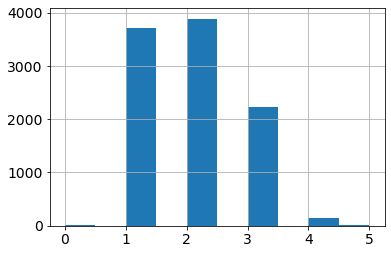

In [21]:
# Посмотрим получившиеся распределения на гистограммах

df_train['Rooms'].hist()

<AxesSubplot:>

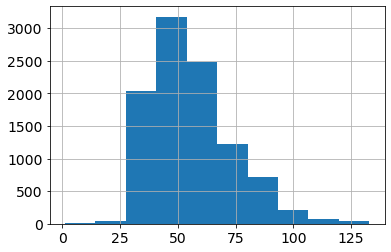

In [22]:
df_train['Square'].hist()

<AxesSubplot:>

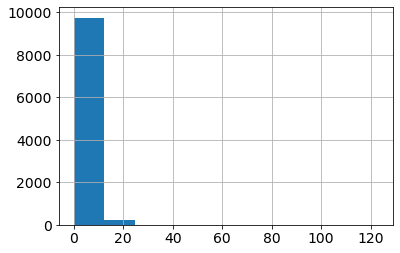

In [23]:
df_train['KitchenSquare'].hist()

<AxesSubplot:>

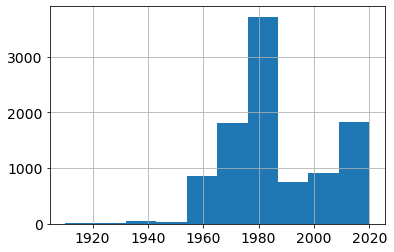

In [24]:
df_train['HouseYear'].hist()

In [25]:
# Новый признак-средняя площадь по району

df_train_disct = df_train.groupby('DistrictId').median()['Rooms']
df_train_disct = pd.DataFrame(df_train_disct)

df_train_disct.rename(columns = {'Rooms':'median_rooms'}, inplace = True)
df_train_disct.sort_values(by = 'median_rooms')
df_train = df_train.merge(df_train_disct, on = ['DistrictId'])

# Новые признаки по стобцам магазины, экология

df_train = pd.concat([df_train, pd.get_dummies(df_train['Ecology_2'],prefix='Ecology_2')],  axis=1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Ecology_3'], prefix='Ecology_3')],  axis=1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Shops_2'], prefix='Shops_2')], axis=1)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Price,median_rooms,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,11809,27,3.0,115.027313,37.489746,10.0,4,10.0,2014,0.075424,...,0,B,305018.875000,2.0,0,1,0,1,0,1
1,4717,27,1.0,44.203945,36.737392,0.0,2,0.0,1977,0.072158,...,0,A,135466.562500,2.0,0,1,0,1,1,0
2,7757,27,2.0,58.783661,55.441257,11.0,13,12.0,1977,0.011654,...,0,B,138396.984375,2.0,0,1,0,1,0,1
3,6846,27,1.0,52.084435,36.928078,6.0,13,17.0,1977,0.072158,...,0,A,155463.093750,2.0,0,1,0,1,1,0
4,13726,27,1.0,47.557690,22.682322,1.0,16,1.0,1977,0.017647,...,0,B,130190.640625,2.0,0,1,0,1,0,1


In [26]:
df_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'median_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B'],
      dtype='object')

In [27]:
df_train.select_dtypes(include=['float64', 'float32', 'float16']).columns

Index(['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor',
       'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Price', 'median_rooms'],
      dtype='object')

In [28]:
medians = df_train[df_train.select_dtypes(include=['float64', 'float32', 'float16']).columns].median()

In [29]:
medians

Rooms                 2.000000
Square               52.513039
LifeSquare           33.820656
KitchenSquare         6.000000
HouseFloor           13.000000
Ecology_1             0.075424
Social_1             25.000000
Social_2           5285.000000
Social_3              2.000000
Healthcare_1        937.944458
Price            192269.656250
median_rooms          2.000000
dtype: float32

In [30]:
# Возможные новые признаки

df_train['Helthcare_2/square'] = df_train['Helthcare_2']/df_train['Square']
df_train['Rooms/floor'] = df_train['Rooms']/df_train['Floor']
df_train['shops_1/square'] = df_train['Shops_1']/df_train['Square']
df_train['Social_2/square'] = df_train['Social_2']/df_train['Square']
df_train['Kitchen/square'] = df_train['KitchenSquare']/df_train['Square']

In [31]:
# Новый категориальный признак-размер района

district_size = df_train['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                   
district_size['IsDistrictLarge'] = 0
q_30=district_size['DistrictSize'].quantile(.3)
q_60=district_size['DistrictSize'].quantile(.6)
q_90=district_size['DistrictSize'].quantile(.6)
district_size.loc[district_size['DistrictSize'] <= q_30,'IsDistrictLarge'] = 1
district_size.loc[district_size['DistrictSize'] > q_60,'IsDistrictLarge'] = 2
district_size.loc[district_size['DistrictSize'] > q_90,'IsDistrictLarge'] = 3

df_train = df_train.merge(district_size, on='DistrictId', how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,Helthcare_2/square,Rooms/floor,shops_1/square,Social_2/square,Kitchen/square,DistrictSize,IsDistrictLarge
0,11809,27,3.0,115.027313,37.489746,10.0,4,10.0,2014,0.075424,...,1,0,1,0.0,0.750000,0.0,26.924040,0.086936,851,3
1,4717,27,1.0,44.203945,36.737392,0.0,2,0.0,1977,0.072158,...,1,1,0,0.0,0.500000,0.0,14.229499,0.000000,851,3
2,7757,27,2.0,58.783661,55.441257,11.0,13,12.0,1977,0.011654,...,1,0,1,0.0,0.153846,0.0,15.565550,0.187127,851,3
3,6846,27,1.0,52.084435,36.928078,6.0,13,17.0,1977,0.072158,...,1,1,0,0.0,0.076923,0.0,12.076545,0.115198,851,3
4,13726,27,1.0,47.557690,22.682322,1.0,16,1.0,1977,0.017647,...,1,0,1,0.0,0.062500,0.0,9.861707,0.021027,851,3


In [32]:
df_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'median_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'Helthcare_2/square', 'Rooms/floor', 'shops_1/square',
       'Social_2/square', 'Kitchen/square', 'DistrictSize', 'IsDistrictLarge'],
      dtype='object')

In [33]:
# Поменяем признак года постройки на категориальный признак 

import datetime

current_year = datetime.datetime.now().year 

df_train['Year'] = current_year-df_train['HouseYear']
df_train['Year'].astype('float32')

df_train['HouseYear'] = 0

df_train.loc[df_train['Year'] >= 60, 'HouseYear'] = 1
df_train.loc[(df_train['Year'] > 50) & (df_train['Year'] <= 60), 'HouseYear'] = 2
df_train.loc[(df_train['Year'] > 30) & (df_train['Year'] <= 49), 'HouseYear'] = 3
df_train.loc[(df_train['Year'] > 20) & (df_train['Year'] <= 29), 'HouseYear'] = 4
df_train.loc[(df_train['Year'] > 10) & (df_train['Year'] <= 19), 'HouseYear'] = 5
df_train.loc[(df_train['Year'] < 9), 'HouseYear'] = 6

In [34]:
df_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'median_rooms',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'Helthcare_2/square', 'Rooms/floor', 'shops_1/square',
       'Social_2/square', 'Kitchen/square', 'DistrictSize', 'IsDistrictLarge',
       'Year'],
      dtype='object')

In [35]:
feature_names = ['Square', 'Rooms', 'LifeSquare',
 'KitchenSquare','Floor','HouseYear','Ecology_1',
 'Social_1','Social_2','Helthcare_2','Shops_1',
'Year','median_rooms','Kitchen/square','DistrictSize',
 'IsDistrictLarge','Ecology_2_A','Ecology_2_B','Helthcare_2/square', 'Rooms/floor',
  'shops_1/square',
  'Social_2/square', 
  'Ecology_3_A',
  'Ecology_3_B','Shops_2_A','Shops_2_B']

target_name = 'Price'

df_train = df_train[feature_names + [target_name]]
df_train.head()

,Square,Rooms,LifeSquare,KitchenSquare,Floor,HouseYear,Ecology_1,Social_1,Social_2,Helthcare_2,...,Ecology_2_B,Helthcare_2/square,Rooms/floor,shops_1/square,Social_2/square,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,115.027313,3.0,37.489746,10.0,4,6,0.075424,11.0,3097.0,0,...,1,0.0,0.750000,0.0,26.924040,0,1,0,1,305018.875000
1,44.203945,1.0,36.737392,0.0,2,3,0.072158,2.0,629.0,0,...,1,0.0,0.500000,0.0,14.229499,0,1,1,0,135466.562500
2,58.783661,2.0,55.441257,11.0,13,3,0.011654,4.0,915.0,0,...,1,0.0,0.153846,0.0,15.565550,0,1,0,1,138396.984375
3,52.084435,1.0,36.928078,6.0,13,3,0.072158,2.0,629.0,0,...,1,0.0,0.076923,0.0,12.076545,0,1,1,0,155463.093750
4,47.557690,1.0,22.682322,1.0,16,3,0.017647,2.0,469.0,0,...,1,0.0,0.062500,0.0,9.861707,0,1,0,1,130190.640625


## Стандартизация признаков

In [36]:
df_train.columns

Index(['Square', 'Rooms', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseYear',
       'Ecology_1', 'Social_1', 'Social_2', 'Helthcare_2', 'Shops_1', 'Year',
       'median_rooms', 'Kitchen/square', 'DistrictSize', 'IsDistrictLarge',
       'Ecology_2_A', 'Ecology_2_B', 'Helthcare_2/square', 'Rooms/floor',
       'shops_1/square', 'Social_2/square', 'Ecology_3_A', 'Ecology_3_B',
       'Shops_2_A', 'Shops_2_B', 'Price'],
      dtype='object')

In [37]:
feature_names_for_stand = df_train[feature_names].select_dtypes(
    include = ['int16','float64','float32', 'float16']).columns.tolist()

feature_names_for_stand 

['Square',
 'Rooms',
 'LifeSquare',
 'KitchenSquare',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'median_rooms',
 'Kitchen/square',
 'Helthcare_2/square',
 'Rooms/floor',
 'shops_1/square',
 'Social_2/square']

In [38]:
feature_names_for_stand  = ['Floor','HouseYear',
'Helthcare_2','Shops_1','Year','DistrictSize',
'IsDistrictLarge','Square','Rooms',
'LifeSquare','KitchenSquare','Ecology_1',
'Social_1','Social_2','median_rooms','Kitchen/square',
'Helthcare_2/square', 'Rooms/floor',
'shops_1/square',
'Social_2/square',
'Ecology_2_A','Ecology_2_B', 'Ecology_3_A',
'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

In [39]:
target_name = 'Price'

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
stand_features = scaler.fit_transform(df_train[feature_names_for_stand])

In [42]:
df_train = df_train.drop(columns=feature_names_for_stand)

In [43]:
stand_features_table = pd.DataFrame(stand_features, columns=feature_names_for_stand)
df_train = df_train.merge(stand_features_table, on=df_train.index)
df_train

,key_0,Price,Floor,HouseYear,Helthcare_2,Shops_1,Year,DistrictSize,IsDistrictLarge,Square,...,Helthcare_2/square,Rooms/floor,shops_1/square,Social_2/square,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0,305018.875000,-0.863728,1.784141,-0.883480,-0.880402,-1.582710,2.262976,0.388299,3.347599,...,-0.757245,1.022240,-0.727625,-0.713849,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
1,1,135466.562500,-1.245343,-0.148560,-0.883480,-0.880402,0.427170,2.262976,0.388299,-0.646717,...,-0.757245,0.370320,-0.727625,-0.826114,-0.09897,0.09897,-0.16816,0.16816,3.334848,-3.334848
2,2,138396.984375,0.853539,-0.148560,-0.883480,-0.880402,0.427170,2.262976,0.388299,0.175554,...,-0.757245,-0.532338,-0.727625,-0.814299,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
3,3,155463.093750,0.853539,-0.148560,-0.883480,-0.880402,0.427170,2.262976,0.388299,-0.202271,...,-0.757245,-0.732929,-0.727625,-0.845154,-0.09897,0.09897,-0.16816,0.16816,3.334848,-3.334848
4,4,130190.640625,1.425961,-0.148560,-0.883480,-0.880402,0.427170,2.262976,0.388299,-0.457571,...,-0.757245,-0.770540,-0.727625,-0.864742,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,254692.421875,0.281117,-0.148560,-0.213923,0.576080,0.372849,-0.878531,-1.745799,0.531887,...,-0.320990,-0.151216,0.202652,0.571797,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
9996,9996,486057.125000,-0.672921,-1.437028,-0.883480,0.784149,3.686435,-0.893402,-1.745799,1.121976,...,-0.757245,0.631088,0.188339,-0.591607,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
9997,9997,479525.156250,-0.291306,-1.437028,-0.883480,0.784149,2.437050,-0.893402,-1.745799,2.252921,...,-0.757245,0.929108,-0.003756,-0.667179,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864
9998,9998,140048.796875,-0.291306,-0.792794,1.125190,-0.672333,1.079023,-0.897120,-1.745799,-1.248535,...,1.783615,-0.560994,-0.469616,-0.034707,-0.09897,0.09897,-0.16816,0.16816,-0.299864,0.299864


Сохранение датасета

In [44]:
df_train.to_csv('prepred_stand_base.csv', index=False, encoding='utf-8', sep=';')

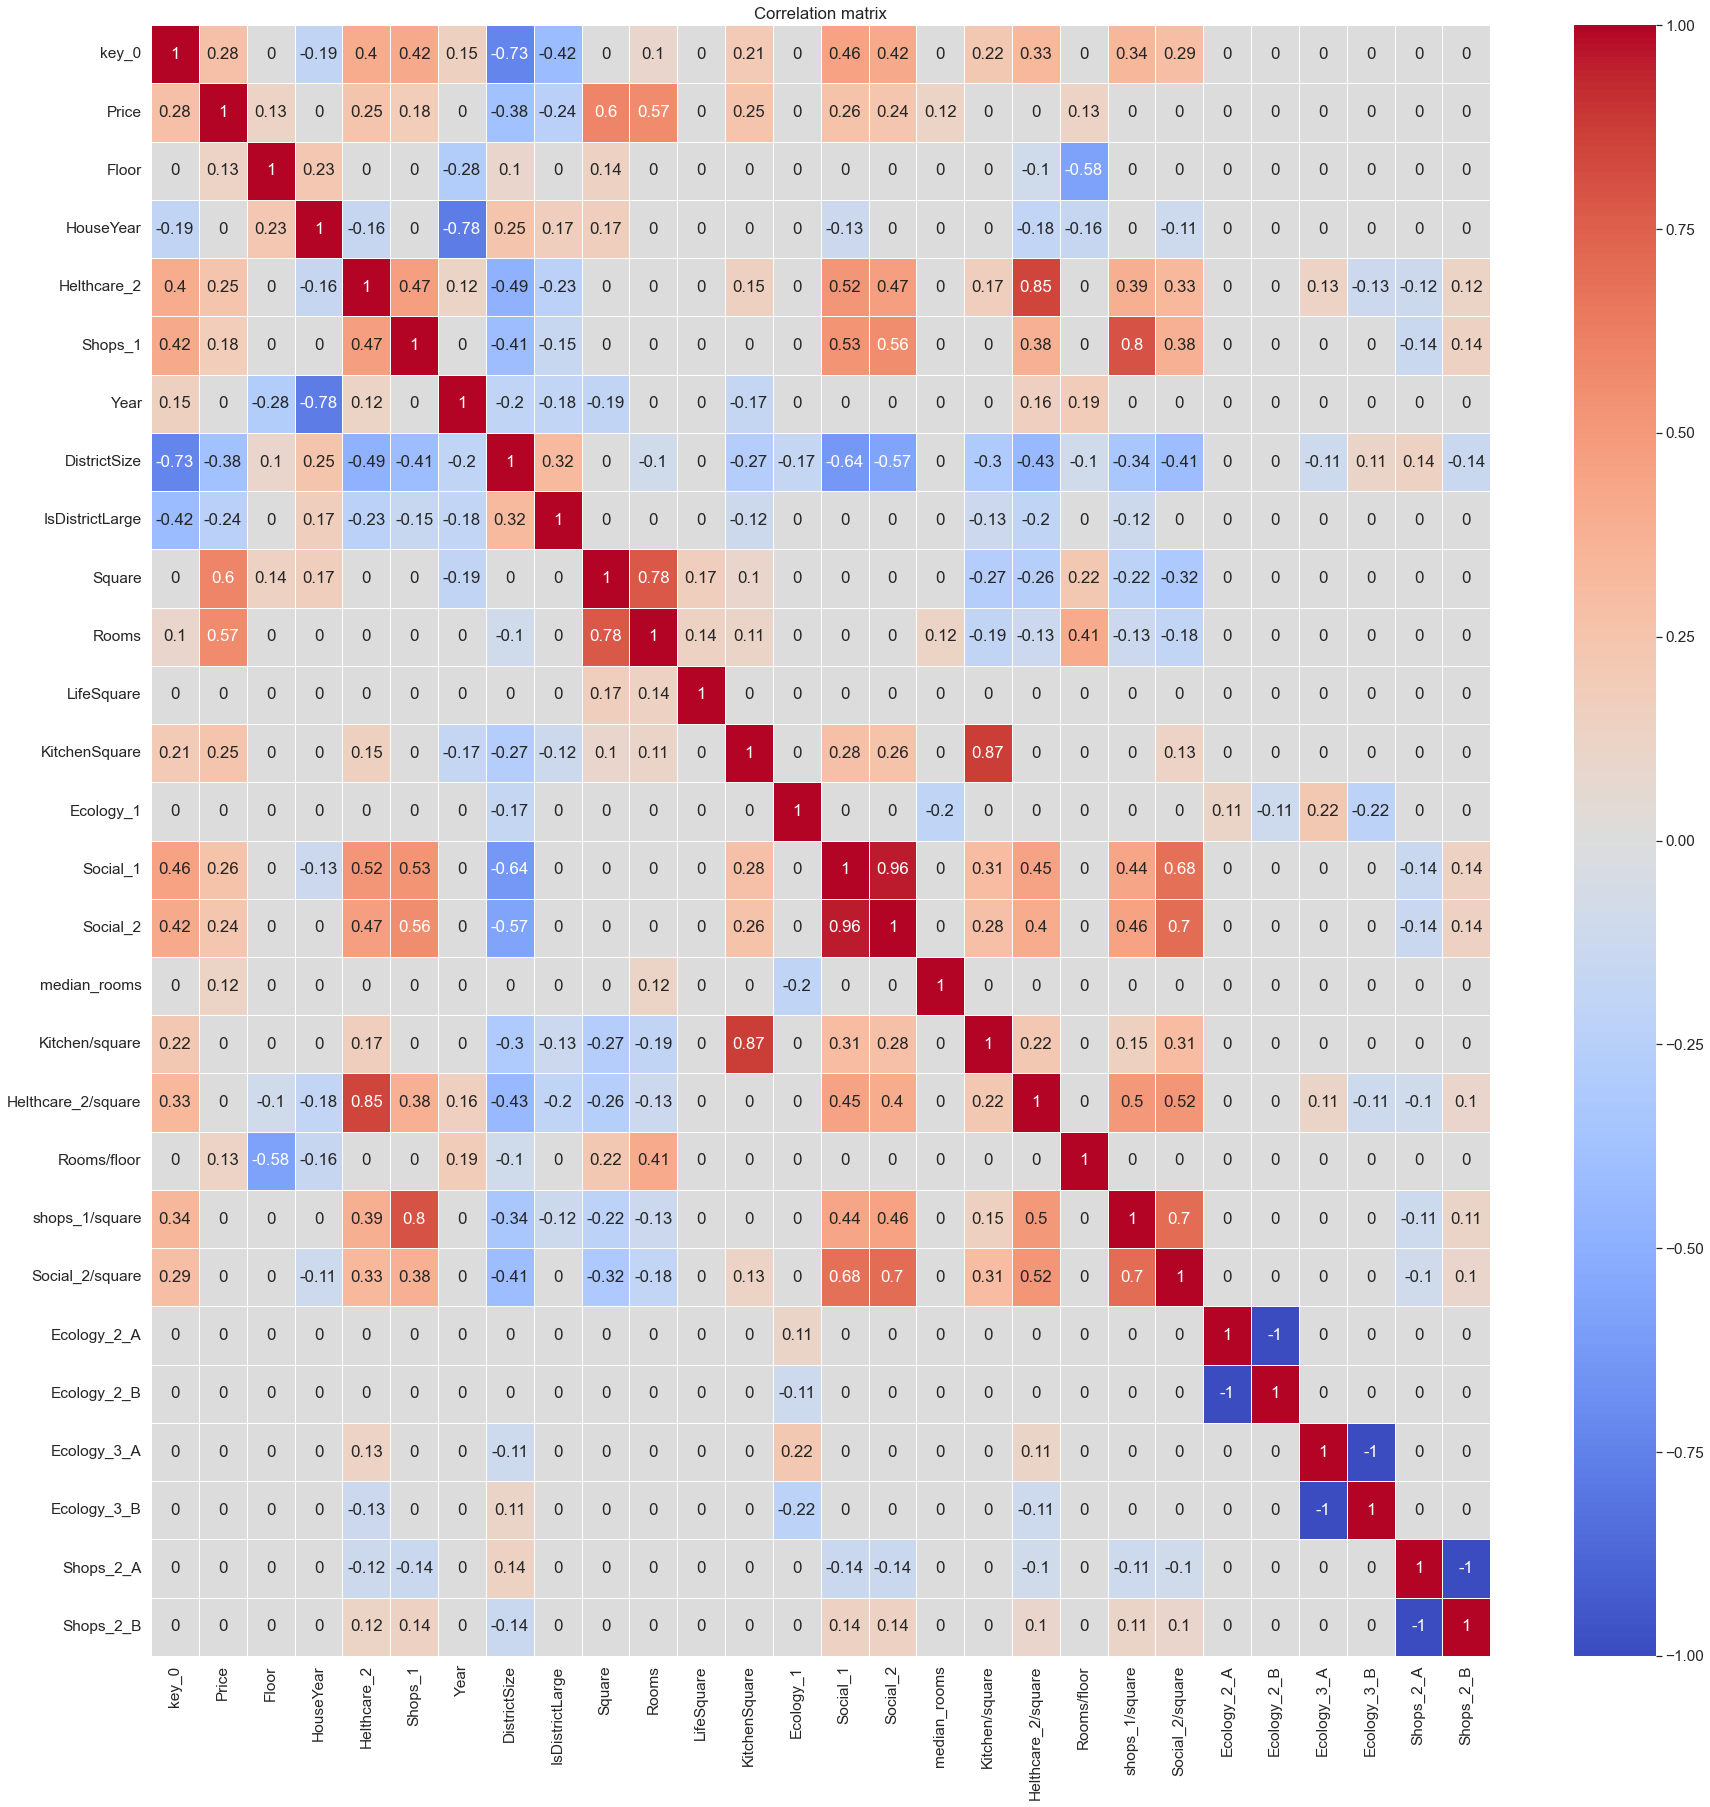

In [45]:
plt.figure(figsize = (30,30))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [46]:
class DataPipeline:
    """Подготовка исходных данных"""
    

        
    def __init__(self):
        """Параметры класса"""
        
        self.DistrictId = None
        self.Rooms = None
        self.Square = None
        self.Floor = None
        self.Social_1 = None
        self.Helthcare_2 = None
        self.Shops_1 = None
        self.LifeSquare = None
        self.HouseYear = None
        self.median_rooms = None
        self.KitchenSquare = None
        self.HouseYear = None
        
    def fit(self, df_train1):
        """Сохранение статистик"""
        
        # Расчет медиан
        
        df_train1['DistrictId'] = df_train1['DistrictId'].astype(str)
        df_train1['Rooms'] = df_train1['Rooms'].astype('int16')
        df_train1['Social_1'] = df_train1['Social_1'].astype('int16')
        df_train1['Social_2'] = df_train1['Social_2'].astype('int16')
        df_train1['Social_3'] = df_train1['Social_3'].astype('int16')
        df_train1['Helthcare_2'] = df_train1['Helthcare_2'].astype('int16')
        df_train1['HouseYear'] = df_train1['HouseYear'].astype('int16')
        df_train1['Id']=df_train1['Id'].astype('object')
        
        self.medians = df_train1[df_train1.select_dtypes(include=['int16','float64', 'float32', 'float16']).columns].median()
        print (self.medians)
        
    def transform(self, df_train1):
        """Трансформация данных"""
        
        # 1. Пропуски
        
        numerical_columns = df_train1.select_dtypes(include=['int16','float64', 'float32', 'float16']).columns
        imputer = KNNImputer(n_neighbors=10, weights="uniform")
        df_train1[numerical_columns] = imputer.fit_transform(df_train1[numerical_columns])

         # 2. Выбросы (outliers)
            
        df_train1.loc[df_train1['Square'] > np.quantile(df_train1['Square'],0.995), 'Square'] = self.medians.Square
        df_train1.loc[df_train1['HouseFloor'] > np.quantile(df_train1['HouseFloor'], 0.999), 'HouseFloor'] = self.medians.HouseFloor
        df_train1.loc[df_train1['Rooms'] > np.quantile(df_train1['Rooms'],0.999), 'Rooms'] = self.medians.Rooms
        df_train1.loc[df_train1['KitchenSquare'] > np.quantile(df_train1['Square'], 0.999), 'KitchenSquare'] = self.medians.KitchenSquare
        df_train1.loc[df_train1['HouseYear'] > 2021, 'HouseYear'] = self.medians.HouseYear
      

         # 3. Новые признаки
    
         # Новый признак-средняя площадь по району

        df_train_disct = df_train1.groupby('DistrictId').median()['Rooms']
        df_train_disct = pd.DataFrame(df_train_disct)

        df_train_disct.rename(columns={'Rooms':'median_rooms'}, inplace=True)
        df_train_disct.sort_values(by='median_rooms')
        df_train1 = df_train1.merge(df_train_disct, on=['DistrictId'])

         # Новые признаки по стобцам магазины, экология

        df_train1 = pd.concat([df_train1, pd.get_dummies(df_train1['Ecology_2'],prefix='Ecology_2')],  axis=1)
        df_train1 = pd.concat([df_train1, pd.get_dummies(df_train1['Ecology_3'], prefix='Ecology_3')],  axis=1)
        df_train1 = pd.concat([df_train1, pd.get_dummies(df_train1['Shops_2'], prefix='Shops_2')], axis=1)
        df_train1.head()
    
 
       
        # Возможные новые признаки

        df_train1['Helthcare_2/square'] = df_train1['Helthcare_2']/df_train1['Square']
        df_train1['Rooms/floor'] = df_train1['Rooms']/df_train1['Floor']
        df_train1['shops_1/square'] = df_train1['Shops_1']/df_train1['Square']
        df_train1['Social_2/square'] = df_train1['Social_2']/df_train1['Square']
        df_train1['Kitchen/square'] = df_train1['KitchenSquare']/df_train1['Square']
        
        
        # 4. Обработка категорий  
        
        district_size = df_train1['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
        district_size['IsDistrictLarge'] = 0
        q_30=district_size['DistrictSize'].quantile(.3)
        q_60=district_size['DistrictSize'].quantile(.6)
        q_90=district_size['DistrictSize'].quantile(.6)
        district_size.loc[district_size['DistrictSize'] <= q_30,'IsDistrictLarge'] = 1
        district_size.loc[district_size['DistrictSize'] > q_60,'IsDistrictLarge'] = 2
        district_size.loc[district_size['DistrictSize'] > q_90,'IsDistrictLarge'] = 3
        df_train1 = df_train1.merge(district_size, on='DistrictId', how='left')

        # Поменяем признак года постройки на категориальный признак
        
        current_year = datetime.datetime.now().year 

        df_train1['Year'] = current_year-df_train1['HouseYear']
        df_train1['Year'].astype('float32')
        df_train1['HouseYear'] = 0

        df_train1.loc[df_train1['Year'] >= 60, 'HouseYear'] = 1
        df_train1.loc[(df_train1['Year'] > 50) & (df_train1['Year'] <= 60), 'HouseYear'] = 2
        df_train1.loc[(df_train1['Year'] > 30) & (df_train1['Year'] <= 49), 'HouseYear'] = 3
        df_train1.loc[(df_train1['Year'] > 20) & (df_train1['Year'] <= 29), 'HouseYear'] = 4
        df_train1.loc[(df_train1['Year'] > 10) & (df_train1['Year'] <= 19), 'HouseYear'] = 5
        df_train1.loc[(df_train1['Year'] < 9), 'HouseYear'] = 6
    
        return df_train1

## Разбиение на train / test 

In [47]:
df_train = pd.read_csv(filepath_or_buffer="train.csv", sep=',')
reduce_mem_usage(df_train)
df_test = pd.read_csv(filepath_or_buffer="test.csv", sep=',')
reduce_mem_usage(df_test)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%
Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.3%


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463676,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837055,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698120,94.521461,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003260,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [48]:
pipe = DataPipeline()
pipe.fit(df_train)
df_train1 = pipe.transform(df_train)

Rooms                 2.000000
Square               52.513309
LifeSquare           32.781261
KitchenSquare         6.000000
HouseFloor           13.000000
HouseYear          1977.000000
Ecology_1             0.075424
Social_1             25.000000
Social_2           5285.000000
Social_3              2.000000
Healthcare_1        900.000000
Helthcare_2           1.000000
Price            192269.656250
dtype: float64


In [49]:
# Отбираем необходимые признаки
        
feature_names = [
                 'Floor','HouseYear',
                 'Helthcare_2','Shops_1','Year','DistrictSize',
                 'IsDistrictLarge','Square','Rooms',
                 'LifeSquare','KitchenSquare','Ecology_1',
                 'Social_1','Social_2','median_rooms','Kitchen/square',
                 'Helthcare_2/square', 'Rooms/floor',
                 'shops_1/square',
                 'Social_2/square',
                 'Ecology_2_A','Ecology_2_B', 'Ecology_3_A',
                 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'
        ]

target_name = 'Price'
df_train1 = df_train1[feature_names + [target_name]]
print (df_train1.columns)

Index(['Floor', 'HouseYear', 'Helthcare_2', 'Shops_1', 'Year', 'DistrictSize',
       'IsDistrictLarge', 'Square', 'Rooms', 'LifeSquare', 'KitchenSquare',
       'Ecology_1', 'Social_1', 'Social_2', 'median_rooms', 'Kitchen/square',
       'Helthcare_2/square', 'Rooms/floor', 'shops_1/square',
       'Social_2/square', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'Price'],
      dtype='object')


In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train1[feature_names_for_stand], \
                                                      df_train1['Price'], test_size=0.33, shuffle=True, random_state=21)

## Построение моделей

In [51]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [52]:
final_model = GradientBoostingRegressor(criterion='squared_error',
                                        max_depth=6,
                                        min_samples_leaf=7,
                                        random_state=42,
                                        n_estimators=120,
                                       learning_rate=0.15)

final_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.15,
                          max_depth=6, min_samples_leaf=7, n_estimators=120,
                          random_state=42)

R2:	0.917
RMSE:	26824.384
MSE:	719547599.377


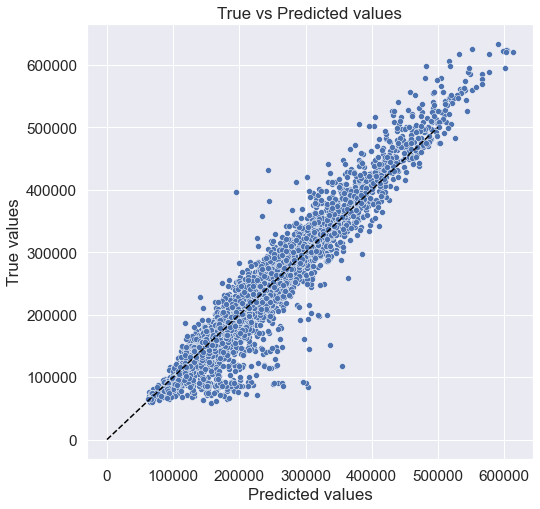

In [53]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(np.squeeze(y_train.values), y_train_preds)

R2:	0.756
RMSE:	45533.418
MSE:	2073292159.073


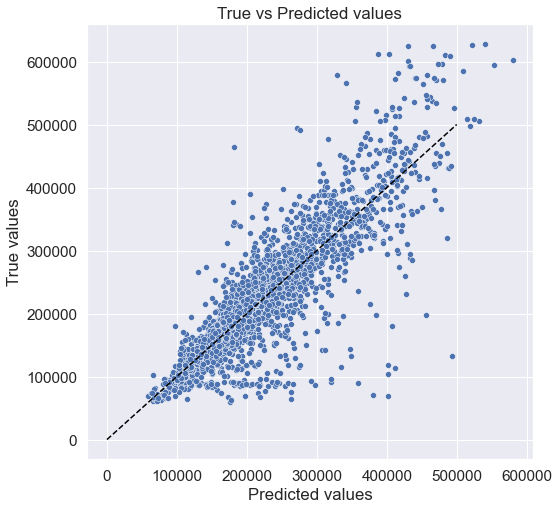

In [54]:
y_test_preds = final_model.predict(X_valid)
evaluate_preds(y_valid, y_test_preds)

# Прогнозирование на тестовом датасете

In [55]:
df_test.shape

(5000, 19)

In [56]:
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463676,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837055,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698120,94.521461,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003260,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [57]:
df_test = pipe.transform(df_test)

In [58]:
df_test = df_test[feature_names]
print (df_test.columns)

Index(['Floor', 'HouseYear', 'Helthcare_2', 'Shops_1', 'Year', 'DistrictSize',
       'IsDistrictLarge', 'Square', 'Rooms', 'LifeSquare', 'KitchenSquare',
       'Ecology_1', 'Social_1', 'Social_2', 'median_rooms', 'Kitchen/square',
       'Helthcare_2/square', 'Rooms/floor', 'shops_1/square',
       'Social_2/square', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')


In [ ]:
predictions = final_model.predict(df_test)
predictions

In [ ]:
len(predictions)